# Our first model

## Some Imports

In [3]:
!pip install tensorflow
!pip install keras

    100% |████████████████████████████████| 317kB 603kB/s ta 0:00:01


In [16]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

sns.set(style='white')

Below, we set up a more systematic way of putting in the paths to the images and csv, since each person has it on a different place in their machines.

In [8]:
USER = 'Gabi'

if USER == 'Gabi':
    PATH = '/Volumes/GBackup/Data/CheXpertDataset'
elif USER == 'Alex':
    PATH = 'C:/blah'
elif USER == 'Vita':
    PATH = '/Volumes'
else:
    PATH = input('What is the path for where you have stored the CheXpert dataset file?')

load the csv file and edit the paths to the actual paths

In [29]:
df = pd.read_csv(PATH + '/train.csv')
df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


/Volumes/GBackup/Data/CheXpertDataset/train/patient00001/study1/view1_frontal.jpg


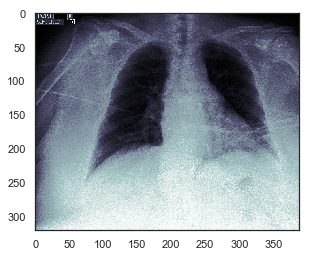

In [33]:
def edit_urls(url):
    pieces = url.split('/')
    newurl = ''
  
      #removing the previous path 'CheXpert-v1.0-small' and including the PATH
    for i, piece in enumerate(pieces):
        if i > 0:
            newurl+= '/' + piece
        elif i == 0:
            newurl += PATH

    return newurl
  
#testing
tester_url = edit_urls(df.iloc[0]['Path'])
print( tester_url )
xray = Image.open(tester_url)
plt.imshow(xray, cmap='bone')
plt.show()

In [35]:
df['Path'] = df['Path'].apply(edit_urls)
df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,/Volumes/GBackup/Data/CheXpertDataset/train/pa...,Female,68,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,/Volumes/GBackup/Data/CheXpertDataset/train/pa...,Female,87,Frontal,AP,0.0,0.0,-1.0,1.0,0.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,1.0,0.0
2,/Volumes/GBackup/Data/CheXpertDataset/train/pa...,Female,83,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,/Volumes/GBackup/Data/CheXpertDataset/train/pa...,Female,83,Lateral,NaN,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,/Volumes/GBackup/Data/CheXpertDataset/train/pa...,Male,41,Frontal,AP,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
outcomes = ['No Finding',
       'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
       'Support Devices']

In [38]:
df[outcomes] = df[outcomes].fillna(0)
df[outcomes] = df[outcomes].replace(-1,1)
df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,/Volumes/GBackup/Data/CheXpertDataset/train/pa...,Female,68,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,/Volumes/GBackup/Data/CheXpertDataset/train/pa...,Female,87,Frontal,AP,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,/Volumes/GBackup/Data/CheXpertDataset/train/pa...,Female,83,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,/Volumes/GBackup/Data/CheXpertDataset/train/pa...,Female,83,Lateral,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,/Volumes/GBackup/Data/CheXpertDataset/train/pa...,Male,41,Frontal,AP,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
df = df[df['Frontal/Lateral'] == 'Lateral']
df.head()
df.shape

(32387, 19)

Separating into a test/train split of 80:20

In [47]:
from sklearn.model_selection import train_test_split

image_train, image_test, label_train, label_test = train_test_split(
    df['Path'], df[outcomes], test_size=0.2, random_state=42)

print(image_train.shape)
print(label_train.shape)

(25909,)
(25909, 14)


Putting the training labels with the paths into one dataset for the data image preprocessing through keras

In [50]:
train_df = pd.concat([image_train, label_train], axis=1)
test_df = pd.concat([image_test, label_test], axis=1)

In [53]:
from keras.preprocessing.image import ImageDataGenerator

#scale the color information to 0 to 1 instead of 0 to 255
datagen = ImageDataGenerator(rescale=1./255)

#For the classifier to work, for some reason it has to be in string format 
test_df['No Finding'] = test_df['No Finding'].apply(str)
train_df['No Finding'] = train_df['No Finding'].apply(str)

train_generator = datagen.flow_from_dataframe(
    train_df, 
    directory=None, 
    x_col='Path', 
    y_col='No Finding', 
    target_size=(256, 256), 
    color_mode='grayscale', 
    classes=None, 
    class_mode='binary', 
    batch_size=32, ##
    shuffle=True, 
    seed=None, 
#     save_to_dir='', 
#     save_prefix='test', 
#     save_format='png', 
    subset=None, 
#     interpolation='nearest', 
    drop_duplicates=True
)

test_generator = datagen.flow_from_dataframe(
    test_df, 
    directory=None, 
    x_col='Path', 
    y_col='No Finding', 
    target_size=(256, 256), 
    color_mode='grayscale', 
    classes=None, 
    class_mode='binary', #later figure out classifier 
    batch_size=32, ##
    shuffle=True, 
    seed=None, 
#     save_to_dir='', 
#     save_prefix='test', 
#     save_format='png', 
    subset=None, 
#     interpolation='nearest', 
    drop_duplicates=True
)

Found 25909 validated image filenames belonging to 2 classes.
Found 6478 validated image filenames belonging to 2 classes.


In [54]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(256, 256, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.train.AdamOptimizer(),
    metrics=['accuracy']
)

W0712 12:56:36.981028 140735986254720 deprecation.py:506] From /Users/gabimuir/anaconda2/envs/django/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [55]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=30,
        epochs=5,
        validation_data=test_generator,
        validation_steps=15
)

Epoch 1/5
30/30 [==============================] - 146s 5s/step - loss: 7.8643 - acc: 0.7323 - val_loss: 0.4703 - val_acc: 0.8417
Epoch 2/5
30/30 [==============================] - 60s 2s/step - loss: 0.5317 - acc: 0.8260 - val_loss: 0.4428 - val_acc: 0.8417
Epoch 3/5
30/30 [==============================] - 169s 6s/step - loss: 0.4451 - acc: 0.8542 - val_loss: 0.4255 - val_acc: 0.8417
Epoch 4/5
30/30 [==============================] - 81s 3s/step - loss: 0.4750 - acc: 0.8229 - val_loss: 0.4166 - val_acc: 0.8417
Epoch 5/5
30/30 [==============================] - 137s 5s/step - loss: 0.4597 - acc: 0.8156 - val_loss: 0.4181 - val_acc: 0.8417


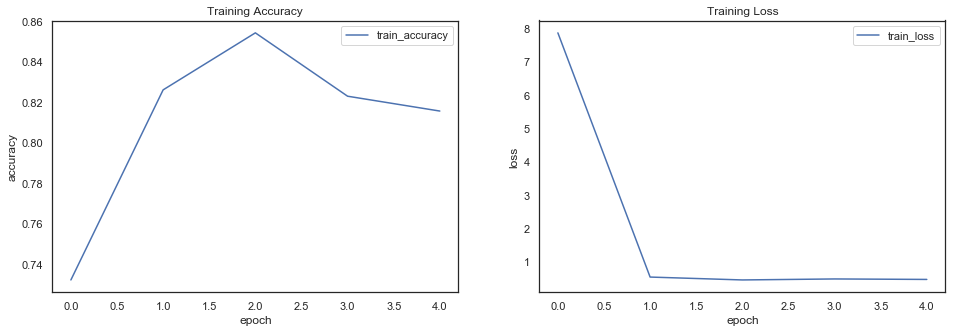

In [56]:
#evaluates model
def model_eval(history):
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['acc'])
    plt.title('Training Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy'], loc='best')
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.title('Training Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss'], loc='best')
    
model_eval(history)

In [57]:
predictions = model.predict(test_generator)
predicted_label = np.argmax(predictions, axis=1)
print(predictions[1])

[0.83568454 0.16431548]


In [59]:
import numpy as np

class_names = ["Sick", "Not Sick"]

# Utility function to plot image and actual label

def plot_image(i, predictions_array, labels, img):
    prediction = predictions_array[i]
    true_label = int(labels[i])

    # Remove grid, x and y axis ticks from the chart
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    # Plot the image
    plt.imshow( img[i, :, :, 0], cmap="gray")

    # Set predicted_label to the highest value from the prediction result
    if prediction[0] > prediction[1]:
        predicted_label = 0
    else:
        predicted_label = 1
        predicted_label = int(round(predicted_label))

    # Set color to blue on a correct prediction, otherwise set color to red
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    # Print the predicted label, confidence number, and actual label
    plt.xlabel("{} ({:2.0f}%) vs {}".format(class_names[predicted_label],
                                100*np.max(prediction),
                                class_names[true_label]),
                                color=color)


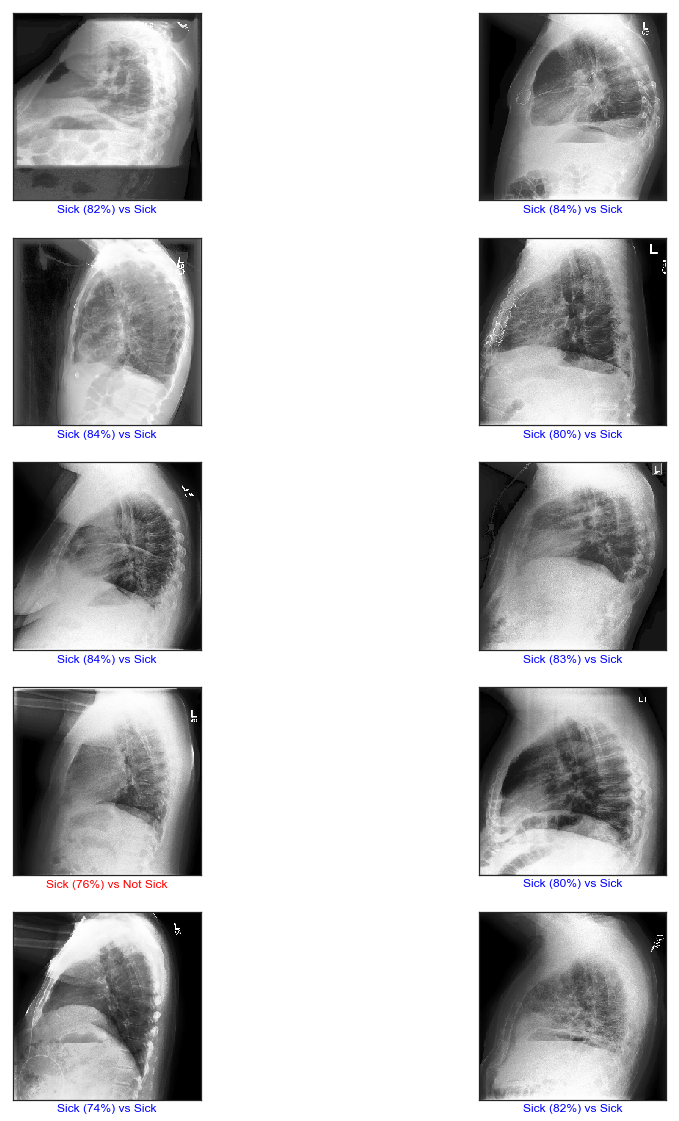

In [60]:
num_rows = 5
num_cols = 2
num_images = num_rows*num_cols

plt.figure(figsize=(4*2*num_cols, 4*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_generator[0][1], test_generator[0][0])

Make an ROC curve for the model

In [78]:
print(len(test_generator))
print(predictions.shape)

203
(6478, 2)


In [96]:
def return_top_prediction(row):
    return np.max(row)

bestpred = np.apply_along_axis(return_top_prediction, 1, predictions)

In [105]:
!pip install tqdm

    100% |████████████████████████████████| 51kB 661kB/s ta 0:00:01


In [125]:
print(len(test_generator)) #number of batches i think
print(len(test_generator[0])) #first layer has 'labels' and 'images'(or something like that. labels=0)
print(len(test_generator[0][0])) #then 32 for the batch size
print(len(test_generator[0][0][0]), ',',len(test_generator[0][0][0][0] )) #then 256,256
print(len(test_generator[0][0][0][0][0] )) #then just 1

203
2
32
256 , 256
1


In [132]:
#the number of bunches times the number of images in each batch
#should actually be the size of the whole test set, I guess
# from above, 6478
# using the math it's 6496, so there will be a little extra space
num_bunches = len(test_generator)
batch_size = len(test_generator[0][0])
length = num_bunches * batch_size
print(length)

bunch = 0
ar = np.asarray(test_generator[bunch][0]) #make numpy arrays of these??
print(ar.shape)

alllabels = np.zeros((length, 256, 256, 1))

for bunch in tqdm(range(len(test_generator))):
    ar = np.asarray(test_generator[bunch][0]) #make numpy arrays of these??
    
    currentindex = bunch * batch_size #this will work til the last
    lastindex = len(test_generator[bunch][0]) + currentindex
    alllabels[currentindex : lastindex] = ar
print(alllabels.shape)


  0%|          | 0/203 [00:00<?, ?it/s]

6496
(32, 256, 256, 1)



 77%|███████▋  | 156/203 [02:03<00:31,  1.50it/s]


100%|██████████| 203/203 [02:34<00:00,  1.92it/s]

(6496, 256, 256, 1)


In [138]:
#get rid of the extra empty columns
alllabels = alllabels[0:len(bestpred)]

In [145]:
print(len(alllabels), len(bestpred))
print(alllabels.shape)
print(test_generator[2][0][0][0][0])

6478 6478
(6478, 256, 256, 1)
[0.3019608]


In [147]:
bestpreds = np.apply_along_axis( np.max, 1, predictions)

#this might be wrong since the predictions were probably made on shuffled sets but whatever
actuallabels = test_df['No Finding']


In [148]:
from sklearn.metrics import roc_curve

falseposrate, trueposrate, thresholds = roc_curve(actuallabels, bestpreds)


ValueError: Data is not binary and pos_label is not specified

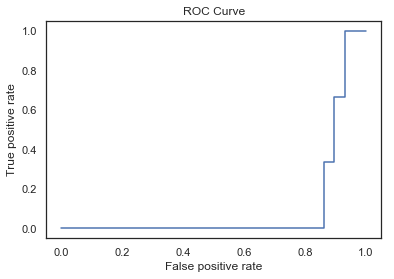

In [95]:
plt.plot(falseposrate, trueposrate)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.show()